## Final Project Submission

* Student name: John Elvis
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Overview

This project employs exploratory data analysis to extract valuable information for Microsoft, aiming to establish a new movie studio. By analyzing datasets from IMDB and Box Office Mojo, the project provides recommendations regarding the film genres that Microsoft should consider exploring. 

The success and popularity of each genre are evaluated using two key metrics: the total gross incomes and the critical response. The results suggest that Microsoft would benefit from concentrating on genres such as Sci-Fi, adventure, animation, and action, as these genres have demonstrated higher total gross income.

## Business Problem

Microsoft intends to join the league of prominent companies by venturing into the production of unique video content. To accomplish this, they plan to establish a movie studio. However, their lack of expertise in the field poses a challenge. This analysis primarily focuses on examining the prevailing trends in successful movies at the box office. Through an exploratory data analysis, valuable insights are generated, which can be used by the head of Microsoft's new movie studio to make informed decisions regarding the genres and themes of films to produce.

Questions :<br>
Which genre of movies have the highest gross income?<br>
Which genre of movies have a higher average rating?<br>
What is the relationship between the average rating and the gross income?<br>
What is the domestic gross and foreign gross income by start year of the movies?<br>

### Importing Modules and Relevant Datasets

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [106]:
#load the datasets
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

### Dataset understanding

The first step is to take a glimpse at your data to understand what variables you’re working with andhow the values are structured based on the column they’re in.This will give a good idea of what data types you might be dealing with, what columns you need to perform transformations or cleaning, and other data you might be able to extract.,<br>
<br>
We will define a function `df_inpsect` to help inspect our datasets.<br>
It returns : <br>
- the first 5 entries of the dataset <br> 
- dataset information <br>
- total number of null values per column in a dataframe <br> 



In [107]:
def df_inspect(df):
    """
    Takes a DataFrame as input, and displays the head, info, and sum of all null values for each column in that DataFrame
    """
    return (display(df.head()), 
            display(df.info()), 
            display(df.isna().sum()))


#### Movie_gross dataframe

In [108]:
#inspect movie_gross dataframe
df_inspect(movie_gross)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

(None, None, None)

From the above output, DataFrame `bom_movie` contains 3387 rows and 5 columns with the following information about movies:
> - title : The title of the movie <br>
> - studio : The studio that produced the movie<br>
> - domestic_gross : The domestic gross revenue of the movie in <br>
> - foreign_gross : The foreign gross revenue of the movie in dollars<br>
> - year : The year in which the movie was released<br>

In [109]:
df_inspect(imdb_title_basics)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

(None, None, None)

From the above output, DataFrame `imdb_title_basics` contains 146144 rows and 6 columns.<br>
<br>
 [Imdb site](https://developer.imdb.com/non-commercial-datasets/) also reveals additional info about the title of each columns:<br>

> - tconst (string) - alphanumeric unique identifier of the title<br>
> - primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release<br>
> - originalTitle (string) - original title, in the original language<br>
> - startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year<br>
> - runtimeMinutes – primary runtime of the title, in minutes<br>
> - genres (string array) – includes up to three genres associated with the title<br>

In [110]:
df_inspect(imdb_ratings)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

tconst           0
averagerating    0
numvotes         0
dtype: int64

(None, None, None)

From the above output, DataFrame `imdb_title_basics` contains 73856 rows and 3 columns:<br>
> - tconst (string) - alphanumeric unique identifier of the title
> - averageRating – weighted average of all the individual user ratings
> - numVotes - number of votes the title has received 

### Data Cleaning

The next step is to clean our data so that we can deal with quality data to enhance analysis.
Steps:
 - Check for missing values
 - Check for duplicate values
 - Amend data types 
 - Fix error values

#### Check for missing values

We create a simple loop to create a list of the entries with missing values for each column of a dataset.

In [111]:
df_list=  [movie_gross,imdb_title_basics, imdb_ratings]
df_list_names = ['Missing Values in movie_gross','Missing Values in imdb_title_basic','Missing Values in imdb_ratings']
for i, n in zip(df_list, df_list_names):
    print(f'{n}:')
    print(i.isna().sum(), '\n ----\n') 

Missing Values in movie_gross:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 
 ----

Missing Values in imdb_title_basic:
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64 
 ----

Missing Values in imdb_ratings:
tconst           0
averagerating    0
numvotes         0
dtype: int64 
 ----



All datasets contain missing values except the `imdb_rating` . This means we will deal with the missing values of the rest datasets.

For `Movie_gross` dataset , we can conclude movie entries with null values did not have domestic gross neither foreign income for that year, hence replacing the value with 0. This occurs for `domestic_gross` and `foreign_gross` .

Studio column contains 5 missing values, we replace this with `None`

In [112]:
#replace the missing values of foreign_gross and domestic_gross with 0.
movie_gross['domestic_gross'] = movie_gross.domestic_gross.fillna(0.0)  
movie_gross['foreign_gross'] = movie_gross.foreign_gross.fillna(0.0) 

#replace missing values of studio with 'None'
movie_gross['studio'] = movie_gross.studio.fillna('None')

Lastly, for `imdb_title_df` , we have  missing values in some columns.<br>
 - The values in `original_title` to be replaced with `primary_title`. 
- `runtime_minutes` are vital for the analysis , the missing values to be replaced with median value of the column.
- Missing values in the genres column will be dropped; genre of each entry is very crucial for analysis .

In [57]:
#replace missing values in the original_title column with the primary title
imdb_title_basics['original_title'] = imdb_title_basics['original_title'].fillna(imdb_title_basics['primary_title'])

# replace  missing values of the runtime_minutes with the median value
imdb_title_basics['runtime_minutes'] = imdb_title_basics['runtime_minutes'].fillna(imdb_title_basics['runtime_minutes'].median())

#drop the missing values in the genres column
imdb_title_basics = imdb_title_basics.dropna(subset=['genres'])

###  Check for duplicate values

We'll use the below code to filter out duplicate for each dataset

In [58]:

#check duplicate records for imdb_ratings dataframe
imdb_ratings[imdb_ratings.duplicated(keep=False, subset=['tconst'])].sort_values(by='tconst')

,tconst,averagerating,numvotes


From the above output,Imdb_ratings doesn't have any duplicates because `tconst` is a unique identifier value.

In [59]:
#display all duplicate records for movie gross 'title' column
movie_gross[movie_gross.duplicated(keep=False, subset='title')].sort_values(by='title')

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,33500.0,5200,2010
3045,Bluebeard,WGUSA,43100.0,0,2017


By further analysing this entries, each stands out to be a different movie and not duplicate values. Different year, studios and gross amount.

In [63]:
#display all duplicate records for imdb_title_basics dataframe using 'primary_title','start_year' and 'genres' columns
imdb_title_basics[imdb_title_basics.duplicated(keep=False, subset=['primary_title','start_year'])].sort_values(by=['primary_title','start_year'])[25:50]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
51820,tt3072686,5 People,5 People,2013,87.0,Thriller
55539,tt3252324,5 People,5 People,2013,87.0,"Comedy,Drama,Thriller"
46602,tt2771990,7 Days,7 Days,2015,87.0,Sci-Fi
88065,tt5112592,7 Days,Nanoka,2015,110.0,Drama
104504,tt6111436,88,88,2016,102.0,Documentary
105408,tt6160528,88,88,2016,103.0,Documentary
86522,tt5017134,8:30,8:30,2017,70.0,Mystery
114899,tt6804666,8:30,8:30,2017,70.0,Mystery
31052,tt2180277,90 Minutes,90 minutter,2012,88.0,Drama
51474,tt3054786,90 Minutes,90 Minutes,2012,94.0,Thriller


`imdb_title_basics` has duplicate records based on the `primary_title` and the `start_year`. Some of the duplicate records have slightly different genres while others have missing values in either the runtime_minutes or genre columns. <br>
The duplicate records will be dropped, while keeping the entry with the least number of missing values.

In [65]:
#assign a different variable name to a copy of the imdb_title_basics dataframe
imdb_title_df = imdb_title_basics.copy()

#assign a new column, 'missing', to the sum of missing values in each row
#sort the dataframe by values of the 'primary_title' and 'missing'
imdb_title_df = imdb_title_df.assign(missing=imdb_title_df.isnull().sum(axis=1)).sort_values(by=['primary_title', 'missing'], ascending=True)

# preview of duplicated records
imdb_title_df[imdb_title_df.duplicated(keep=False, subset=['primary_title','start_year'])][:20]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,missing
103890,tt6085916,(aguirre),(aguirre),2016,97.0,"Biography,Documentary",0
106201,tt6214664,(aguirre),(aguirre),2016,98.0,"Biography,Comedy,Documentary",0
129962,tt8032828,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography,0
129979,tt8034014,100 Milioni di bracciate,100 Milioni di bracciate,2017,87.0,Biography,0
20394,tt1855110,180,180,2011,121.0,"Drama,Romance",0
24194,tt1979163,180,180,2011,107.0,"Comedy,Drama",0
65431,tt3735338,1989,1989,2014,54.0,Documentary,0
72121,tt4119270,1989,1989,2014,97.0,"Documentary,History,Thriller",0
50212,tt2979366,21 Days,21 Days,2014,89.0,"Horror,Thriller",0
75495,tt4312624,21 Days,21 den,2014,70.0,Documentary,0


Then, we drop duplicates to obatin values entries with least missing values

In [67]:
imdb_title_df = imdb_title_df.drop_duplicates(keep='first', subset=['primary_title','start_year']).drop(columns='missing')

To check for any more duplicates:

In [68]:
#recheck for duplicates
imdb_title_df[imdb_title_df.duplicated(keep=False, subset=['primary_title','start_year'])].sort_values(by=['primary_title','start_year'])

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


### Amend data types

Each column should have correspondingly valid data types so that analsysis can occur without any hitches. The function `df_inspect` contains a method `.info` that provides information for each dataset passed through. <br>

We can find the dataype for each column using `.dtypes` . As below :

In [113]:
#check the data type of each column 
print(f'movie gross data types: \n {movie_gross.dtypes} \n ---')
print(f'\n imdb title  data types: \n {imdb_title_df.dtypes} \n ---')
print(f'\n imdb ratings data types: \n {imdb_ratings.dtypes} \n ---')

movie gross data types: 
 title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object 
 ---

 imdb title  data types: 
 tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object 
 ---

 imdb ratings data types: 
 tconst            object
averagerating    float64
numvotes           int64
dtype: object 
 ---


Notice that column foreign_gross has object values instead of float values to represent number values. So we convert to float values :


In [70]:
#Convert the data type of the foreign_gross column from object to float
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(",","").apply(float)

We call out the type of `foreign_gross` to confirm :

In [71]:
movie_gross['foreign_gross'].dtype

dtype('float64')

### Amend error values

In the Boc office dataset, we notice there are movie that have pre-planned release year(under `start_year` column). So, we align data upto year of current record(2022):

In [72]:
#check for years greater than 2022 in imdb_title_df
imdb_title_df[imdb_title_df['start_year'] > 2022]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
89506,tt5174640,100 Years,100 Years,2115,87.0,Drama
16337,tt1757678,Avatar 3,Avatar 3,2023,87.0,"Action,Adventure,Drama"
52213,tt3095356,Avatar 4,Avatar 4,2025,87.0,"Action,Adventure,Fantasy"
96592,tt5637536,Avatar 5,Avatar 5,2027,87.0,"Action,Adventure,Fantasy"
105187,tt6149054,Fantastic Beasts and Where to Find Them 5,Fantastic Beasts and Where to Find Them 5,2024,87.0,"Adventure,Family,Fantasy"
2483,tt10255736,Untitled Marvel Project,Untitled Marvel Project,2023,87.0,Action
2949,tt10300398,Untitled Star Wars Film,Untitled Star Wars Film,2026,87.0,Fantasy
106865,tt6258542,Wraith of the Umbra and Eidolon II,Wraith of the Umbra and Eidolon II,2023,87.0,"Adventure,Drama,Fantasy"


In [73]:
# drop records with start_year more than 2022
imdb_title_df = imdb_title_df[imdb_title_df['start_year'] <= 2022]

In [74]:
#recheck
imdb_title_df[imdb_title_df['start_year'] > 2022]

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [75]:
#check for years greater than 2022 in movie_gross
movie_gross[movie_gross['year'] > 2022]

,title,studio,domestic_gross,foreign_gross,year


And we are done with cleaning the data.

## Merging of dataframes

I merge the imdb_title_df with imdb_rating to provide more entries within a row

In [76]:
#merge imdb_title_df and imdb_ratings using an inner join
joined_imdb_df = imdb_title_df.merge(imdb_ratings, on='tconst', how='inner')
joined_imdb_df.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1699720,!Women Art Revolution,Women Art Revolution,2010,83.0,Documentary,6.9,196
1,tt2346170,#1 Serial Killer,#1 Serial Killer,2013,87.0,Horror,5.6,40
2,tt3120962,#5,#5,2013,68.0,"Biography,Comedy,Fantasy",6.8,6
3,tt5255986,#66,#66,2015,116.0,Action,5.3,18
4,tt7853996,#ALLMYMOVIES,#ALLMYMOVIES,2015,87.0,Documentary,8.3,21
5,tt9844890,#AbroHilo,#AbroHilo,2019,52.0,Documentary,6.6,8
6,tt6170868,#BKKY,#BKKY,2016,75.0,Drama,7.4,23
7,tt5074174,#BeRobin the Movie,#BeRobin the Movie,2015,41.0,Documentary,9.0,31
8,tt4353986,#Beings,#Beings,2015,56.0,Thriller,5.3,18
9,tt6856592,#Captured,#Captured,2017,81.0,Thriller,2.8,212


`joined_imdb_df` dataframe contains two columns for the movie title: `primary_title` and the `original_title`<br>
It is important to determine the column to use for merging the movie_gross_df and joined_imdb_df dataframes.<br>
Further checking on the IMDB website reveals:
- `primary_title` is the title used by the filmmakers on promotional materials at the point of release.
- original_title is the original title, in the original language <br>

Hence, we merge the two dataframes using `primary_title`

In [77]:
#Rename primary_title column to title
joined_imdb_df.rename(columns = {'primary_title': 'title'}, inplace = True)
#Merge movie_gross_df and joined_imdb_df on the title column using an inner join
movies_df = joined_imdb_df.merge(movie_gross, on='title', how='inner')
movies_df.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,NaN,2014
2,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016
3,tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,NaN,2012
4,tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,NaN,2015


We check the shape of the merged `movies_df`

In [79]:
#check info of movies_df

movies_df.shape

(2948, 12)

In [80]:
#check for duplicates in merged dataframe
movies_df.duplicated().value_counts()

False    2948
dtype: int64

In [102]:
#unique value counts in columns with dtype object in the merged dataset
cat_columns = movies_df.select_dtypes(include='object').columns
for column in cat_columns:
    print(f'{column}:')
    print(movies_df[column].value_counts())
    print()

tconst:
tt6599340    2
tt2442772    2
tt4481414    1
tt2034139    1
tt3623726    1
            ..
tt3025936    1
tt6651330    1
tt1298650    1
tt0857190    1
tt2473510    1
Name: tconst, Length: 2946, dtype: int64

title:
Gold                     6
One Day                  6
Youth                    5
We Are Family            5
Bluebeard                4
                        ..
Irrational Man           1
Veronica Mars            1
Graduation               1
Mr. Popper's Penguins    1
Certified Copy           1
Name: title, Length: 2598, dtype: int64

original_title:
Mama                      4
Anna                      4
Nerve                     4
The Gambler               4
Bodyguard                 4
                         ..
I Spit on Your Grave 2    1
Få meg på, for faen       1
The Babadook              1
Little Boy                1
Life After Beth           1
Name: original_title, Length: 2704, dtype: int64

genres:
Drama                      296
Comedy,Drama               

### Total Gross Income

From looking at the datasets, it is deduced that the total gross  income column can be added to the dataframe. The total gross income can be calculated by finding the sum of the domestic gross income and the foreign gross income for each movie. <br>

For movies without either of foreign or domestic gross, the total gross is null.

In [82]:
#total_gross: domestic gross income + foreign gross income
movies_df = movies_df.copy()
movies_df['total_gross'] = movies_df['domestic_gross'] + movies_df['foreign_gross']
movies_df.head(5)

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,tt2614684,'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,355000.0,2015,1655000.0
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,NaN,2014,NaN
2,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,38100000.0,2016,110200000.0
3,tt1715873,10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,NaN,2012,NaN
4,tt3346824,1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,NaN,2015,NaN


### Separate the genre categories

The genre column has multiple categories in a single row. The categories can be separated so that there is one category in each row. <br>
Method .`explode` is used to transform each element of a list-like to a row, replicating index values.

In [83]:
#make a copy of the dataframe = movies
movies = movies_df.copy()
#split the genre categories into a list, around the comma separator
movies['genres'] = movies['genres'].str.split(',')
#transform each element in the genres list to a row
movies = movies.explode('genres')

In [84]:
#preview the first five rows of the movies dataframe 
movies.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
0,tt2614684,'71,'71,2014,99.0,Action,7.2,46103,RAtt.,1300000.0,355000.0,2015,1655000.0
0,tt2614684,'71,'71,2014,99.0,Drama,7.2,46103,RAtt.,1300000.0,355000.0,2015,1655000.0
0,tt2614684,'71,'71,2014,99.0,Thriller,7.2,46103,RAtt.,1300000.0,355000.0,2015,1655000.0
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,Drama,7.1,6848,FM,53900.0,NaN,2014,NaN
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,War,7.1,6848,FM,53900.0,NaN,2014,NaN


In [85]:
#reset index
movies = movies.reset_index(drop=True)

In [86]:
#value counts of the genres column in the new dataset after separating the genres
movies['genres'].value_counts()

Drama          1718
Comedy          918
Action          638
Romance         464
Thriller        439
Adventure       436
Crime           379
Biography       282
Horror          230
Documentary     216
Mystery         206
Fantasy         166
Animation       151
Sci-Fi          135
History         134
Family          114
Music            89
Sport            52
War              50
Western          21
Musical          18
News              2
Name: genres, dtype: int64

In [87]:
#value counts of the genres column in the dataset before separating the genres
movies_df['genres'].value_counts()

Drama                      296
Comedy,Drama               131
Comedy,Drama,Romance       131
Drama,Romance              111
Documentary                104
                          ... 
Fantasy,Mystery,Romance      1
Action,Comedy,War            1
Drama,Fantasy,Music          1
Crime,Mystery                1
Action,Romance               1
Name: genres, Length: 320, dtype: int64

## Data Visualization

### Number of movies per genre

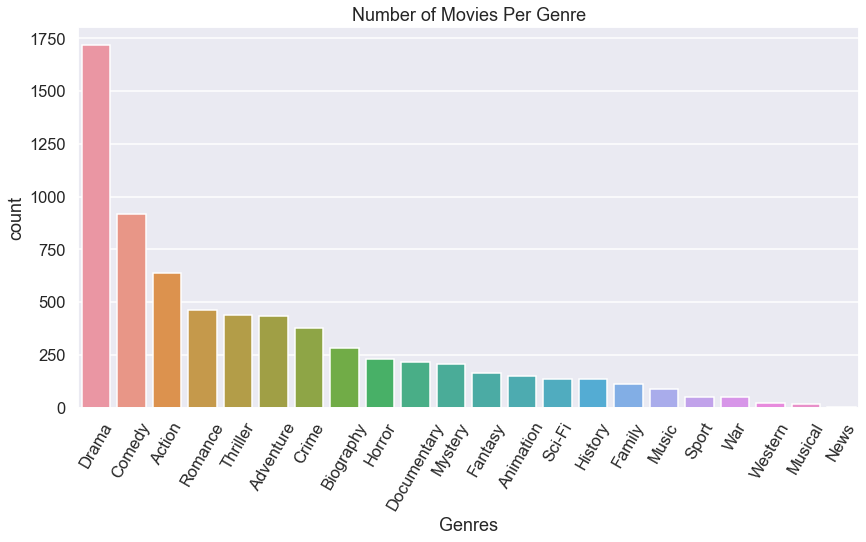

In [89]:
#countplot showing the number of movies per genre
sns.set(style='darkgrid')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.countplot(x=movies['genres'], order=movies['genres'].value_counts().index)
ax.set_title('Number of Movies Per Genre')
ax.set_xlabel('Genres')
plt.xticks(rotation=60);

Drama, comedy and action are the genres that have the highest number of movies released in this dataset. Drama and  comedy are probably the largest film genres because they include a broad spectrum of films. They are more general categories, hence can fall into a movie with more than one genre classification.<br>

The genres with the least number of movies are war, western, musical and news. These genres are more specific based on the plot of the movie.

### Distribution of the movies' average rating

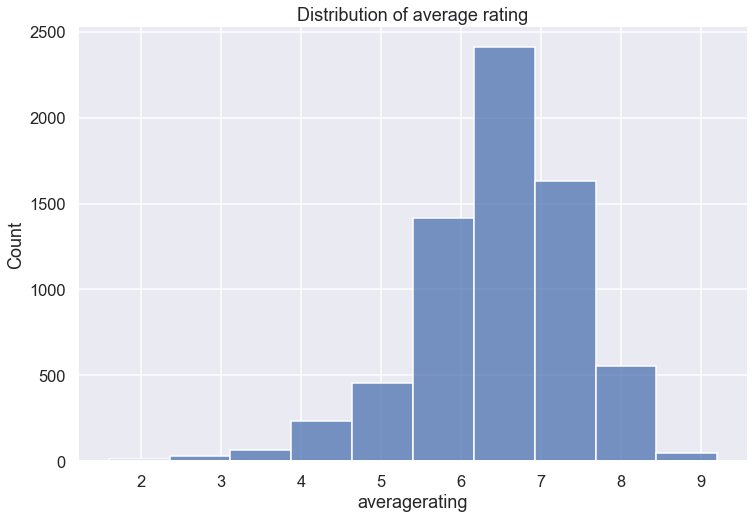

In [90]:
#histogram showing the average rating distribution
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(movies['averagerating'], bins= 10, ax=ax)
ax.set_title('Distribution of average rating');

Most movies have an average rating of around 6. Generally, the distribution is negatively skewed. There are a few movies with a rating of less than 4.<br>
After understanding this distribution, it is important to look at the average rating by genre.

### Genre of movies with the highest average rating

In [91]:
genres_rating_df = movies.groupby('genres')['averagerating'].mean().sort_values(ascending = False)
genres_rating_df.head()

genres
Documentary    7.280093
Biography      6.971986
Sport          6.896154
History        6.888806
War            6.786000
Name: averagerating, dtype: float64

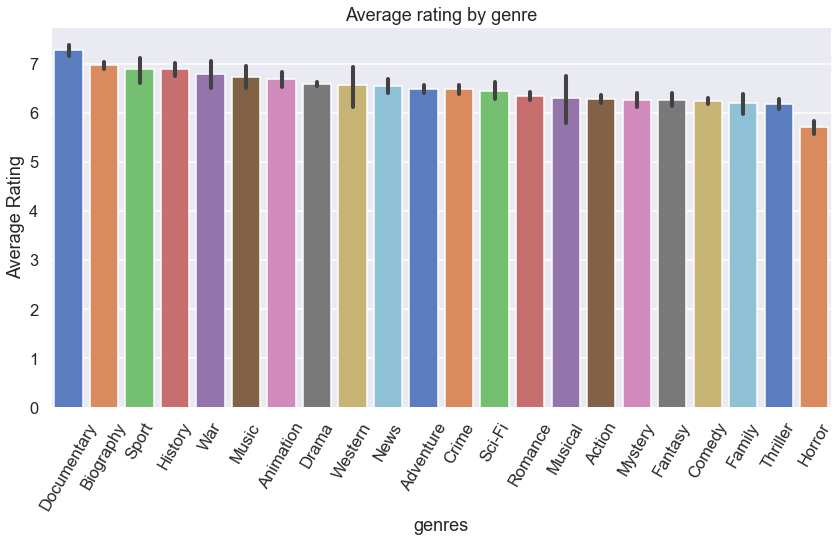

In [93]:
# bar graph showing the average rating by genre
fig, ax =plt.subplots(figsize=(14,7))
order_by = movies.groupby('genres')['averagerating'].mean().sort_values(ascending=False).index
sns.barplot(data=movies, x='genres', y= 'averagerating', palette='muted', order=order_by, ax=ax)
ax.set_title('Average rating by genre')
ax.set_ylabel('Average Rating')
plt.xticks(rotation=60);

The difference between the heights of the bars, which represent the average rating, is quite small.<br>
Documentary, biography and sport have the highest average rating while family, thriller and horror have the lowest average rating.

### Total gross income by genre 

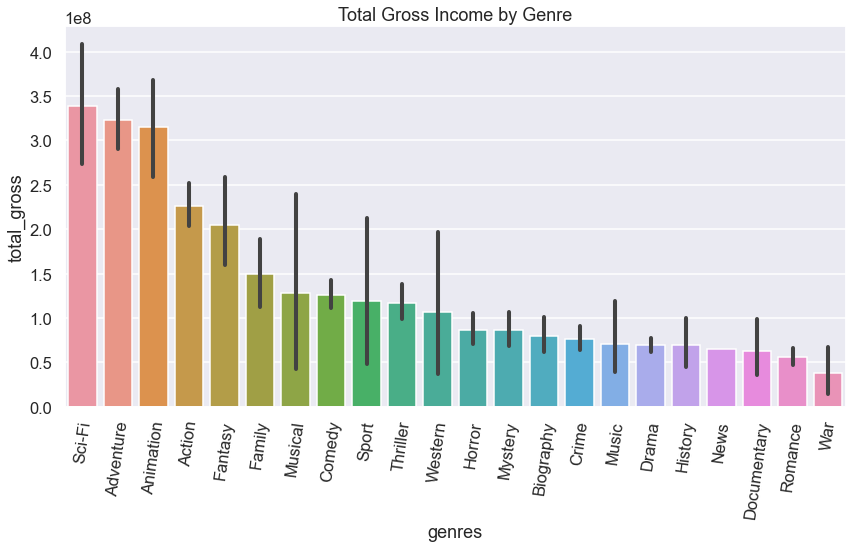

In [103]:
#bar graph showing the total gross income by genre
fig, ax =plt.subplots(figsize=(14,7))
order_by = movies.groupby('genres')['total_gross'].mean().sort_values(ascending=False).index
sns.barplot(data=movies, x='genres', y= 'total_gross', order=order_by, ax=ax)
ax.set_title('Total Gross Income by Genre')
plt.xticks(rotation=82);

Box office Mojo tracks theatrical box office earnings. Additional sources of revenue, such as home entertainment sales and rentals, television rights, product placement fees are not included.<br>
The genres with the highest income are Sci-Fi, adventure, animation and action while the genres with the lowest income are romance, documentary and war.<br>

Various factors can affect the total gross income of a movie. In this case, I will investigate if there is a relationship between the average rating and the gross income.

### Relationship between the average rating and the gross income

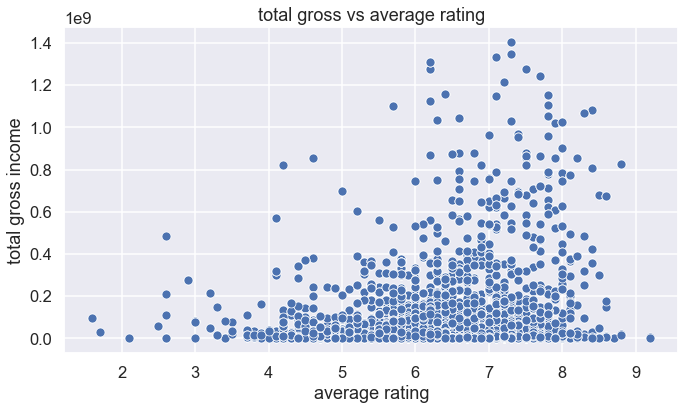

In [100]:
#scatter plot showing  total gross vs average rating
fig, ax =plt.subplots(figsize=(11,6))
sns.scatterplot(x=movies['averagerating'], y=movies['total_gross'], ax=ax)
ax.set_title('total gross vs average rating')
ax.set_ylabel('total gross income')
ax.set_xlabel('average rating');

There is no clear relationship between the total gross income and the average rating. However, movies with a low average rating of below 4 have a low total gross income.

### Gross income by start year

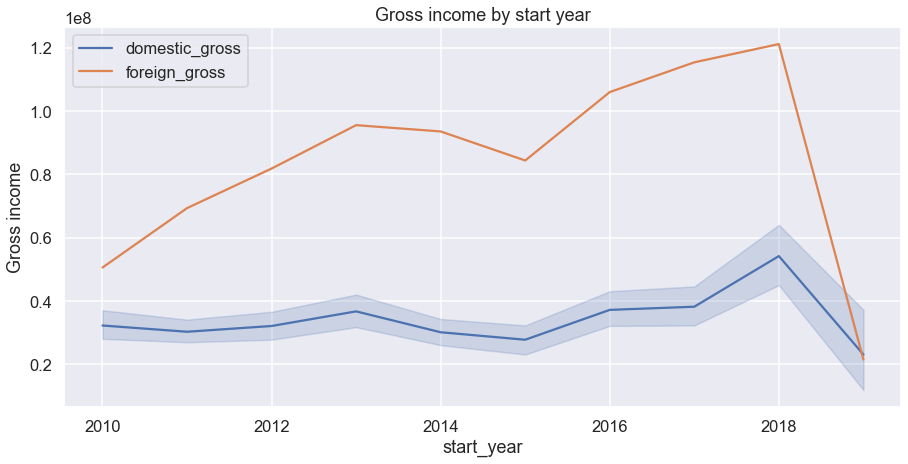

In [101]:
#lineplot showing the domestic gross and foreign gross income by start year
fig, ax =plt.subplots(figsize=(15,7))
sns.lineplot(data=movies, x='start_year', y='domestic_gross', ax=ax, label='domestic_gross')
sns.lineplot(data=movies, x='start_year', y='foreign_gross', label='foreign_gross', ax=ax)
ax.set_title('Gross Income by Start Year')
ax.set_ylabel('Gross income');

Throughout the years, the foreign gross is often higher than the domestic gross income when a movie is released. <br>
Movies that were released in 2018 had the highest foreign gross and domestic gross income.The gross incomes then drastically dropped to their lowest for movies that were released in 2019. This is probably because most people preferred to utilize streaming services rather than go to the theatres. <br>For instance, from 2019, Netflix grew at an astonishing pace around the world.  The streaming video company added 9.6 million paid subscribers in the first three months of 2019.

## Conclusions and recommendations

- The genres of most of the movies that have been released are drama, comedy and action.<br>
- From the dataset available, the popularity and success of a given genre can be determined based on the average rating of the genre or the total gross income of the genre.<br>
- Documentary, biography and sport have the highest average rating while Sci-Fi, adventure, animation and action have the highest total gross income.Despite documentary and biography having the highest average rating, they have a very low income.There is no clear relationship between the total gross income and the average rating.
- Microsoft should consider focusing on genres with the highest total gross income in order to get higher returns on their investment. These genres are Sci-Fi, adventure, animation and action. They seem to appeal to a broad audience hence have a high theatrical box office earnings. 
- Microsoft should focus on exploring more the international markets  which have had a higher gross over the years when compared to the domestic markets. The movies created should consider the interests of the international market.
- Due to the drastic drop in the gross from theatrical earnings for movies released in 2019, Microsoft should look into other sources of revenue and invest in them.

## Future work

- Further research should be done to determine the best time of the year to release a movie of a certain genre.
- It is beneficial to determine whether the total gross income of a genre increases proportionally if the production, development, marketing, and advertising budgets of the movie are increased. This can help in predicting the profits based on the budget.
- Other than theatrical earnings, there are other sources of revenue for studios such as home entertainment sales and rentals, television rights, product placement fees and streaming services. It would be important to collect data about these sources of revenue and compare them to the revenue from the theatre earnings.
